![IMG-20250825-WA0001[1].jpg](attachment:1644a355-7dc4-430c-a74b-49c72142d561.jpg)
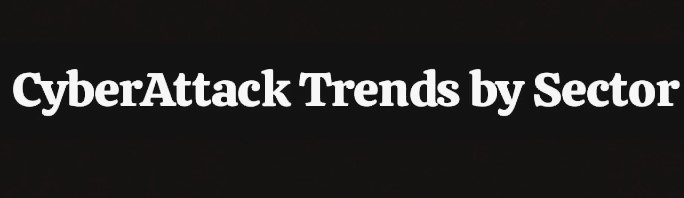

[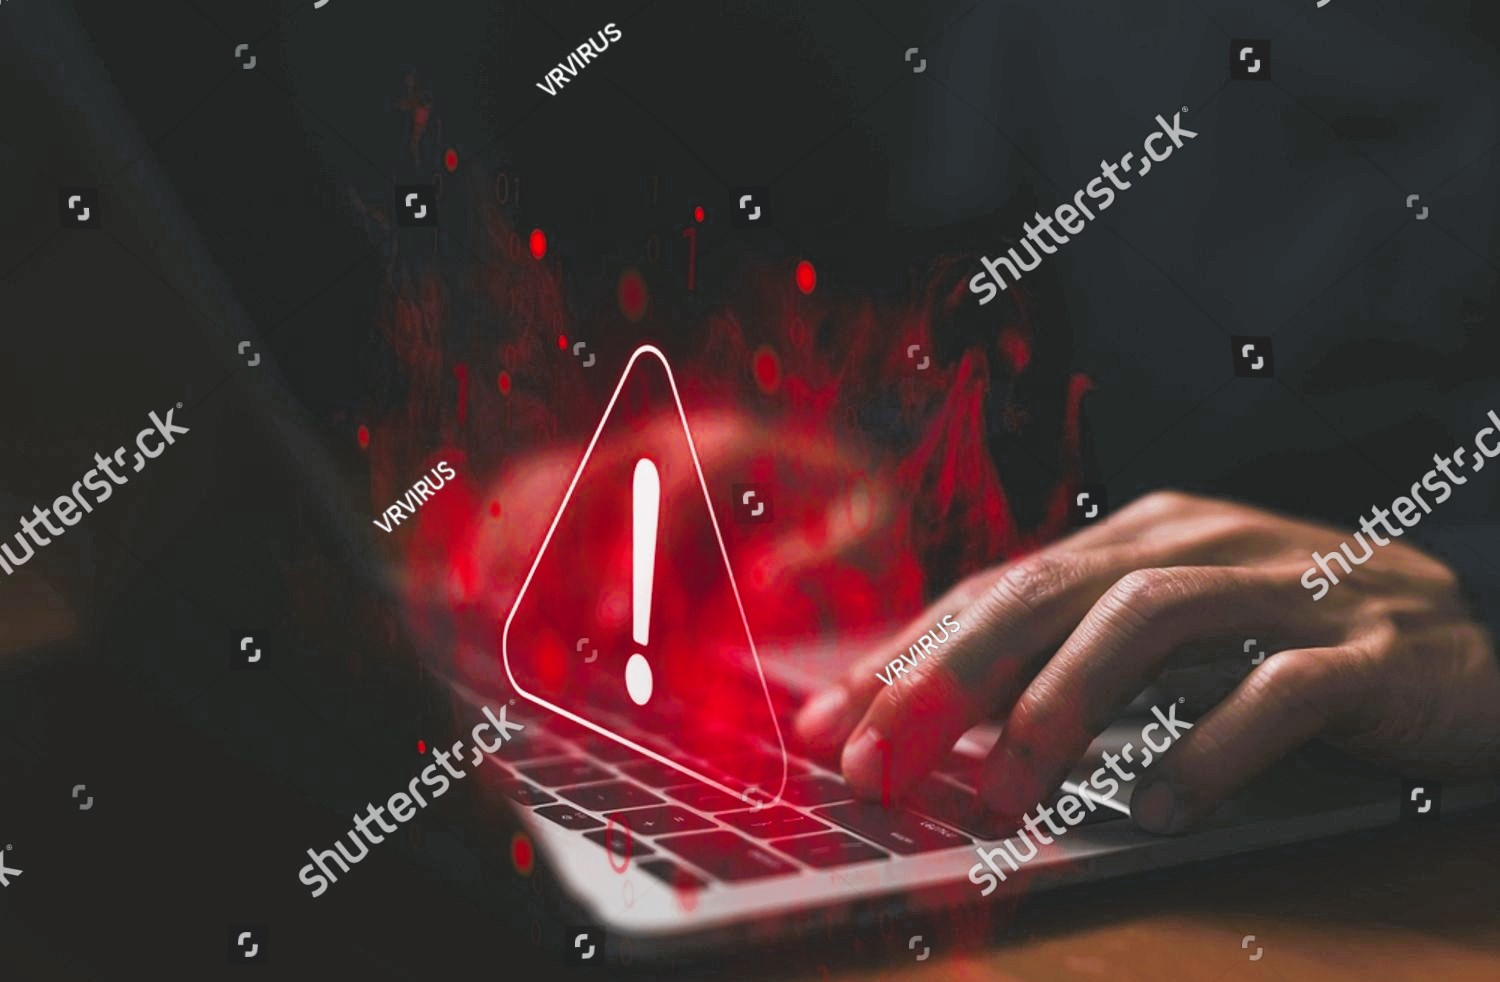](http://)

📌Project Description

This project analyzes reported cyber incidents to identify patterns and trends.  
The focus is on understanding how cyberattacks vary by industry and over time,  
as well as discovering the most common attack vectors.

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv
/kaggle/input/cybersecurity-cases-india/cybersecurity_cases_india_combined.csv


In [14]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv
/kaggle/input/cybersecurity-cases-india/cybersecurity_cases_india_combined.csv


In [23]:
import pandas as pd

file_path = ('/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv')
df = pd.read_csv(file_path)

print(df.head())
print(df.head())
print("Dataset Shape:", df.shape)

   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software               Firewall   
2              Weak 

In [38]:
print(df.columns)

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')


In [39]:
# Remove any extra spaces from column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')


In [40]:
print(df['Target Industry'].unique())    # Check sectors
print(df['Attack Type'].unique())        # Check attack vectors

['Education' 'Retail' 'IT' 'Telecommunications' 'Government' 'Banking'
 'Healthcare']
['Phishing' 'Ransomware' 'Man-in-the-Middle' 'DDoS' 'SQL Injection'
 'Malware']


In [ ]:
📌Dataset Details

Name: Global Cyber Security Threats Dataset  
Source: Kaggle  
Columns include:
- Country
- Year
- Attack Type
- Target Industry
- Financial Loss
- Number of Affected Users
- Attack Source
- Security Vulnerability Type
- Defense Mechanism Used
- Incident Resolution and Time

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

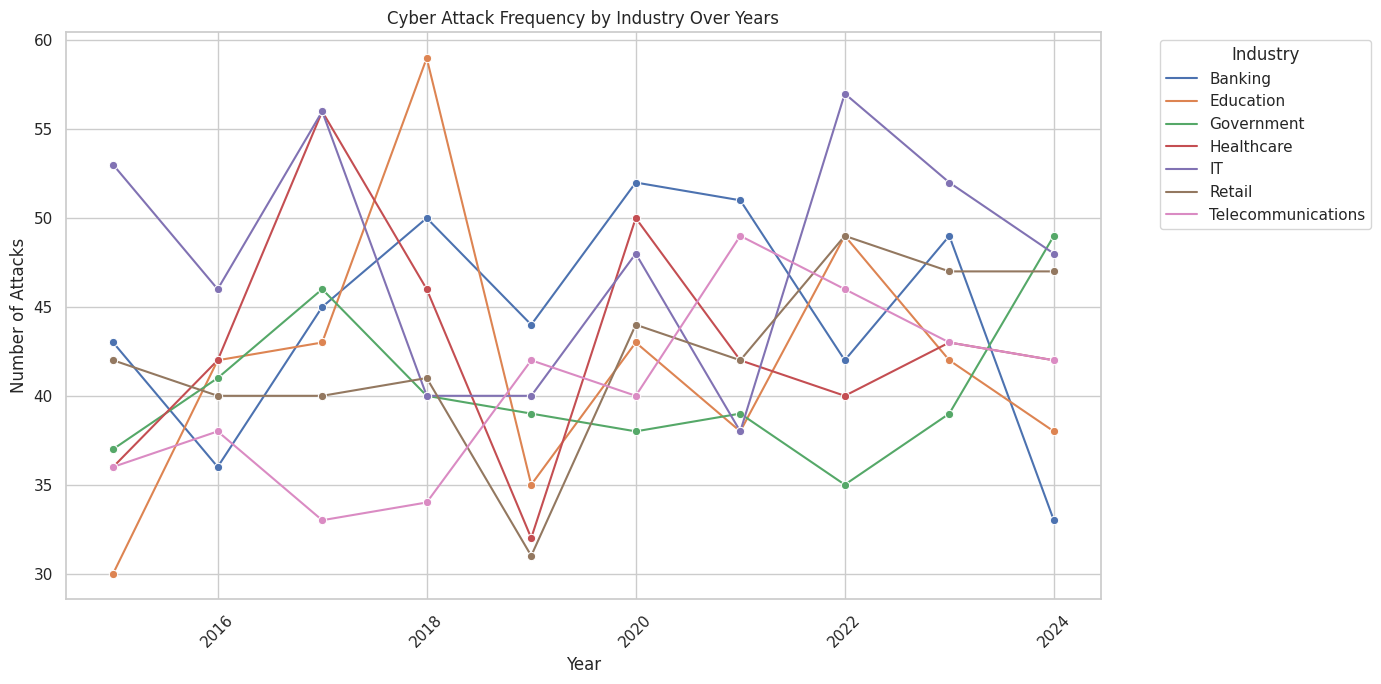

In [41]:
sector_year = df.groupby(['Target Industry', 'Year']).size().reset_index(name='Count')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(14,7))
sns.lineplot(data=sector_year, x='Year', y='Count', hue='Target Industry', marker='o')
plt.title("Cyber Attack Frequency by Industry Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

- Frequency of Attacks by Industry

Created a line chart showing the number of reported incidents per industry across the years.  
This reveals which sectors are most affected and trends over time.

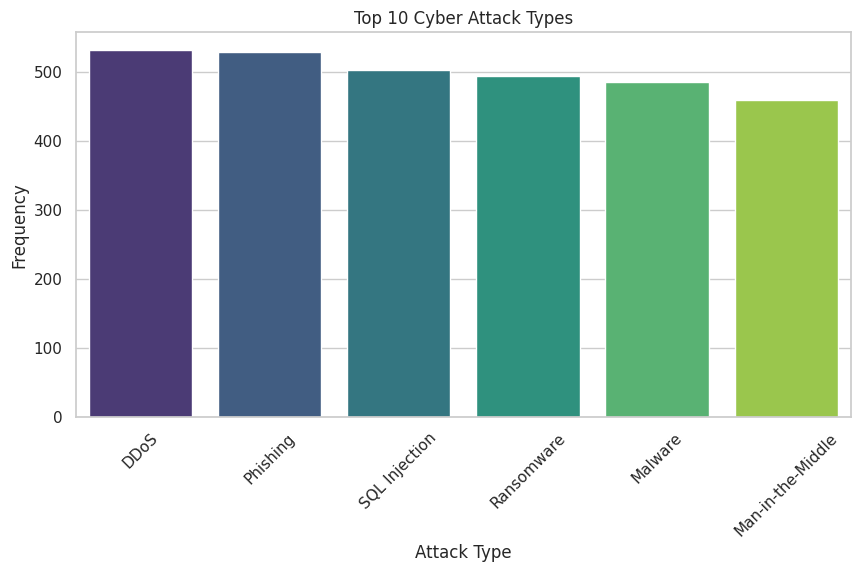

In [42]:
top_vectors = df['Attack Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_vectors.index, y=top_vectors.values, palette='viridis')
plt.title("Top 10 Cyber Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

- Top Attack Types
  
Plotted a bar chart of the top 10 most common attack types to identify the primary attack vectors used by cybercriminals.

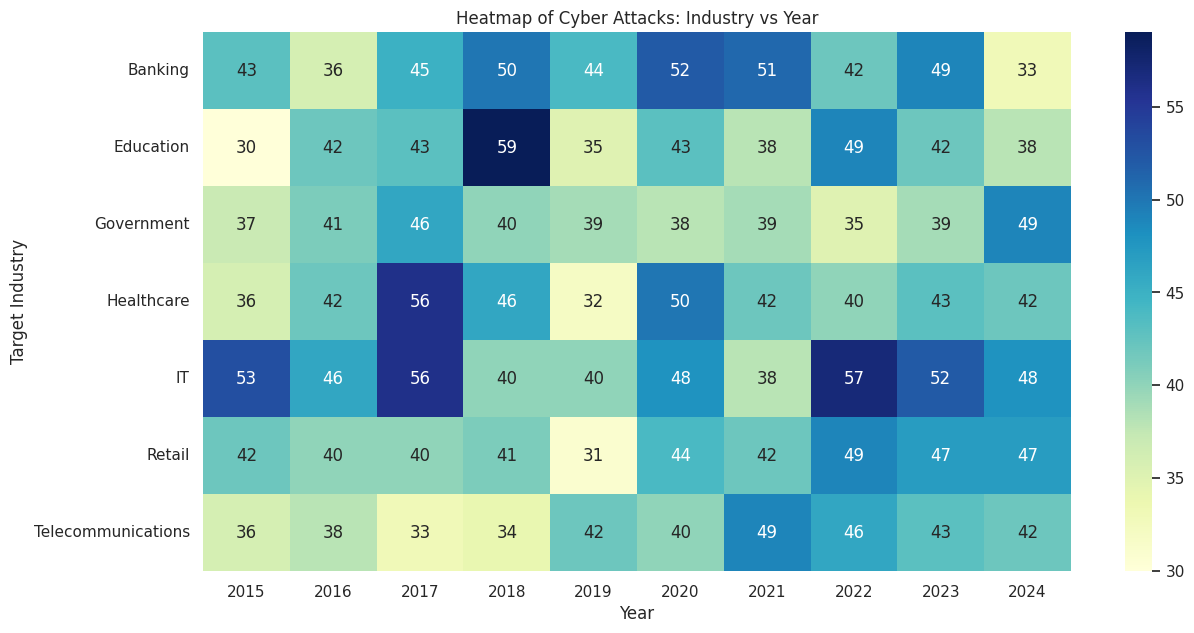

In [33]:
pivot_sector_year = df.pivot_table(index='Target Industry', columns='Year', aggfunc='size', fill_value=0)

plt.figure(figsize=(14,7))
sns.heatmap(pivot_sector_year, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Cyber Attacks: Industry vs Year")
plt.xlabel("Year")
plt.ylabel("Target Industry")
plt.show()

- Pivot Table

Summarized the number of incidents for each industry per year using a pivot table.  
This helps spot patterns, trends, and industries most frequently targeted over time.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


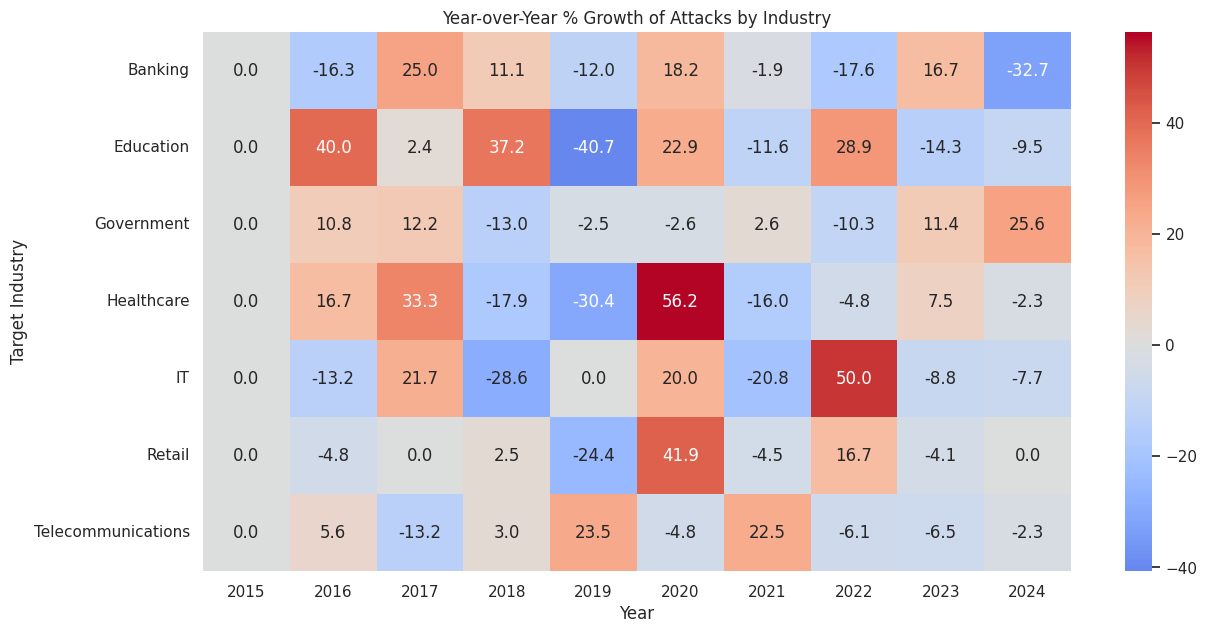

In [35]:
pct_growth = pivot_sector_year.pct_change(axis=1).fillna(0) * 100

plt.figure(figsize=(14,7))
sns.heatmap(pct_growth, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Year-over-Year % Growth of Attacks by Industry")
plt.xlabel("Year")
plt.ylabel("Target Industry")
plt.show()

- Heatmap of Attacks

Visualized the pivot table using a heatmap to easily identify high-risk industries and years with concentrated attacks.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

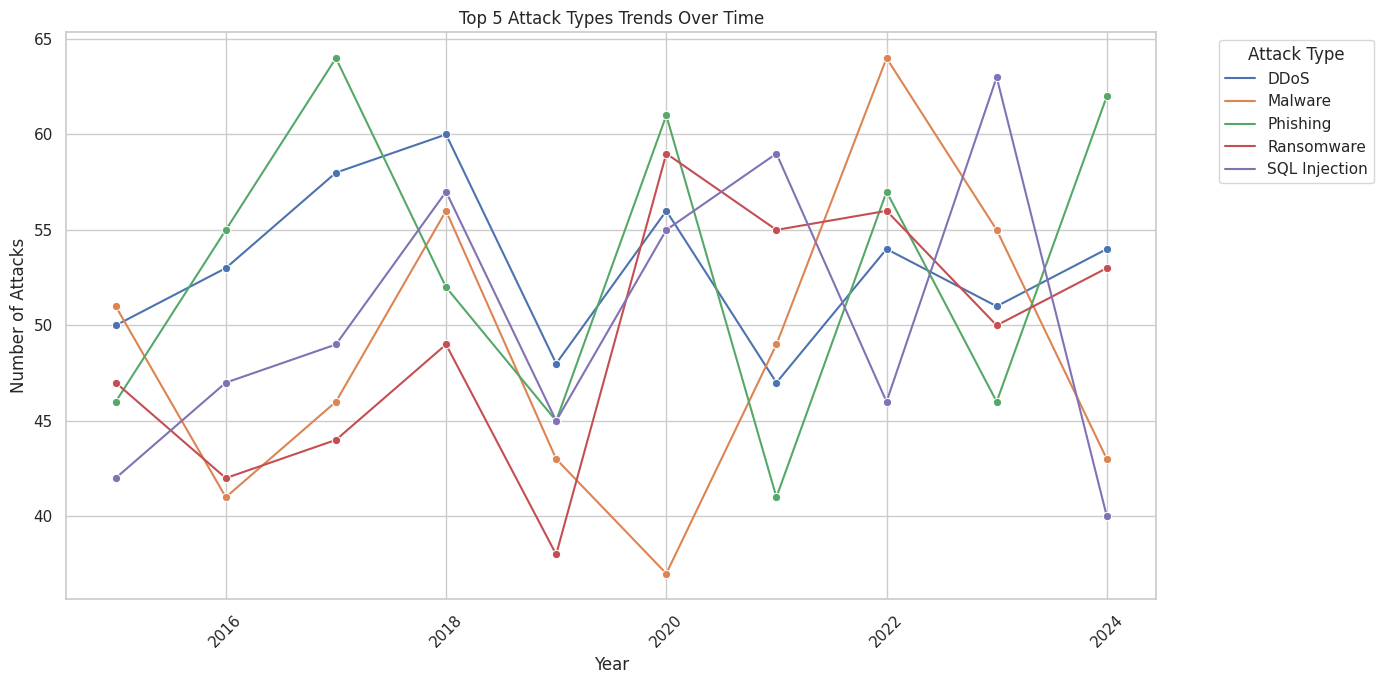

In [36]:
attack_year = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')
top_attack_overall = df['Attack Type'].value_counts().head(5).index
attack_year_top = attack_year[attack_year['Attack Type'].isin(top_attack_overall)]

plt.figure(figsize=(14,7))
sns.lineplot(data=attack_year_top, x='Year', y='Count', hue='Attack Type', marker='o')
plt.title("Top 5 Attack Types Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45)
plt.legend(title='Attack Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

- Top 5 Attack Trends Over Time

Tracked the yearly frequency of the five most common attack types.  
This highlights which attack vectors are increasing, decreasing, or remaining steady over time.

- CyberAttack Trends Analysis Conclusion:

Goal 1: Analyzed the frequency of cyberattacks by sector and year — identified which industries faced the most incidents and peak years.

Goal 2: Identified top attack vectors — highlighted the most common attack methods across industries.

Insights: Certain sectors are consistently targeted, and a few attack types dominate overall trends.

Recommendation: Focus security measures on the high-risk industries and prioritize defenses against the top attack vectors.